## Customer Segmentation with Machine Learning.

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [37]:


#--- Read in dataset ----
df = pd.read_csv("Orders_Analysis.csv")
df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [38]:
print(df.shape)

(70052, 17)


In [39]:
print(df.columns)

Index(['product_title', 'product_type', 'variant_title', 'variant_sku',
       'variant_id', 'customer_id', 'order_id', 'day', 'net_quantity',
       'gross_sales', 'discounts', 'returns', 'net_sales', 'taxes',
       'total_sales', 'returned_item_quantity', 'ordered_item_quantity'],
      dtype='object')


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [41]:
print(df.describe())

         variant_id   customer_id      order_id  net_quantity   gross_sales  \
count  7.005200e+04  7.005200e+04  7.005200e+04  70052.000000  70052.000000   
mean   2.442320e+11  6.013091e+11  5.506075e+13      0.701179     61.776302   
std    4.255079e+12  6.223201e+12  2.587640e+13      0.739497     31.800689   
min    1.001447e+07  1.000661e+06  1.000657e+13     -3.000000      0.000000   
25%    2.692223e+07  3.295695e+06  3.270317e+13      1.000000     51.670000   
50%    4.494514e+07  5.566107e+06  5.522207e+13      1.000000     74.170000   
75%    7.743106e+07  7.815352e+06  7.736876e+13      1.000000     79.170000   
max    8.422212e+13  9.977409e+13  9.999554e+13      6.000000    445.000000   

          discounts       returns     net_sales         taxes   total_sales  \
count  70052.000000  70052.000000  70052.000000  70052.000000  70052.000000   
mean      -4.949904    -10.246051     46.580348      9.123636     55.703982   
std        7.769972     25.154677     51.802690    

In [42]:
print(df['product_type'].value_counts())

Product P    23352
Product H    15963
Product D     7079
Product B     3510
Product N     3348
Product W     2677
Product A     2461
Product C     2456
Product R     2106
Product J     1549
Product O     1158
Product F     1055
Product Q      638
Product G      548
Product I      499
Product M      449
Product U      383
DPR            266
Product T      228
Product E      201
Product L      115
Product K       10
Product S        1
Name: product_type, dtype: int64


In [43]:
df.isnull().sum()

product_title             0
product_type              0
variant_title             0
variant_sku               0
variant_id                0
customer_id               0
order_id                  0
day                       0
net_quantity              0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
taxes                     0
total_sales               0
returned_item_quantity    0
ordered_item_quantity     0
dtype: int64

In [44]:
df =df[df['ordered_item_quantity']>0]
df.head(5
        )

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [45]:
column_list = ['customer_id', 'product_type']

aggregated_dataframe = df.groupby(column_list)['ordered_item_quantity'].count().reset_index()
def encode_column(column):
    if column > 0:
        return 1
    else:
        return 0
    
aggregated_dataframe["products_ordered"] = aggregated_dataframe['ordered_item_quantity'].apply(encode_column)
customers_orders = aggregated_dataframe.groupby('customer_id')['products_ordered'].sum().reset_index()
aggregated_dataframe



,customer_id,product_type,ordered_item_quantity,products_ordered
0,1000661,Product P,3,1
1,1001914,Product B,1,1
2,1002167,Product H,1,1
3,1002167,Product P,1,1
4,1002167,Product W,1,1
...,...,...,...,...
43305,98854671633650,Product P,2,1
43306,98974226154136,Product H,1,1
43307,99262726332691,Product H,1,1
43308,99262726332691,Product P,2,1


In [46]:
column_list = ['customer_id', 'product_type']


aggregated_dataframe = df.groupby(column_list)['ordered_item_quantity'].count().reset_index()
def encode_column(column):
    if column > 0:
        return 1
    else:
        return 0
    
aggregated_dataframe["products_ordered"] = aggregated_dataframe['ordered_item_quantity'].apply(encode_column)
customers_orders = aggregated_dataframe.groupby('customer_id')['products_ordered'].sum().reset_index()

sorted_dataframe = aggregated_dataframe.sort_values(by='ordered_item_quantity', ascending=False)

sorted_dataframe.head(5)

,customer_id,product_type,ordered_item_quantity,products_ordered
34896,8325158,Product P,22,1
4063,1870339,Product P,17,1
9203,2972702,Product P,16,1
16286,4437079,Product P,12,1
2461,1527995,Product P,12,1


In [47]:
ordered_sum_by_customer_order = df.groupby(['customer_id','order_id'])["ordered_item_quantity"].sum().reset_index()
ordered_sum_by_customer_order

,customer_id,order_id,ordered_item_quantity
0,1000661,99119989117212,3
1,1001914,79758569034715,1
2,1002167,38156088848638,1
3,1002167,57440147820257,1
4,1002167,58825523953710,1
...,...,...,...
42131,98854671633650,57138827010765,1
42132,98974226154136,45066842874543,1
42133,99262726332691,88173870014223,2
42134,99262726332691,99798633226297,1


In [48]:
returned_sum_by_customer_order = df.groupby(['customer_id','order_id'])["returned_item_quantity"].sum().reset_index()
returned_sum_by_customer_order

,customer_id,order_id,returned_item_quantity
0,1000661,99119989117212,0
1,1001914,79758569034715,0
2,1002167,38156088848638,0
3,1002167,57440147820257,0
4,1002167,58825523953710,0
...,...,...,...
42131,98854671633650,57138827010765,0
42132,98974226154136,45066842874543,0
42133,99262726332691,88173870014223,0
42134,99262726332691,99798633226297,0


In [49]:
returned_sum_by_customer_order.sample(4)

,customer_id,order_id,returned_item_quantity
26688,6733004,99153806497487,0
35338,8612725,63289242166960,0
9643,3138776,17469248467135,0
13549,3967681,41645295278339,0


In [50]:
ordered_returned_sums = pd.merge(ordered_sum_by_customer_order,returned_sum_by_customer_order,on=['customer_id','order_id'])
ordered_returned_sums

,customer_id,order_id,ordered_item_quantity,returned_item_quantity
0,1000661,99119989117212,3,0
1,1001914,79758569034715,1,0
2,1002167,38156088848638,1,0
3,1002167,57440147820257,1,0
4,1002167,58825523953710,1,0
...,...,...,...,...
42131,98854671633650,57138827010765,1,0
42132,98974226154136,45066842874543,1,0
42133,99262726332691,88173870014223,2,0
42134,99262726332691,99798633226297,1,0


In [51]:
ordered_returned_sums['average_return_rate'] = -ordered_returned_sums['returned_item_quantity']/ordered_returned_sums['ordered_item_quantity']

In [52]:
ordered_returned_sums

,customer_id,order_id,ordered_item_quantity,returned_item_quantity,average_return_rate
0,1000661,99119989117212,3,0,0.0
1,1001914,79758569034715,1,0,0.0
2,1002167,38156088848638,1,0,0.0
3,1002167,57440147820257,1,0,0.0
4,1002167,58825523953710,1,0,0.0
...,...,...,...,...,...
42131,98854671633650,57138827010765,1,0,0.0
42132,98974226154136,45066842874543,1,0,0.0
42133,99262726332691,88173870014223,2,0,0.0
42134,99262726332691,99798633226297,1,0,0.0


In [53]:
customer_return_rate = ordered_returned_sums.groupby('customer_id')['average_return_rate'].mean().reset_index()
customer_return_rate

,customer_id,average_return_rate
0,1000661,0.0
1,1001914,0.0
2,1002167,0.0
3,1002387,0.0
4,1002419,0.0
...,...,...
24869,97805007741979,0.0
24870,98854671633650,0.0
24871,98974226154136,0.0
24872,99262726332691,0.0


In [54]:
return_rates = customer_return_rate['average_return_rate'].value_counts().reset_index()
return_rates.columns = ['average return rate', 'count of unit return rate']


In [55]:
customers  = pd.merge(customers_orders,customer_return_rate,on='customer_id',how='left')
customers

,customer_id,products_ordered,average_return_rate
0,1000661,1,0.0
1,1001914,1,0.0
2,1002167,3,0.0
3,1002387,1,0.0
4,1002419,2,0.0
...,...,...,...
24869,97805007741979,2,0.0
24870,98854671633650,2,0.0
24871,98974226154136,1,0.0
24872,99262726332691,2,0.0


In [56]:
customer_total_spending = df.groupby('customer_id')['total_sales'].sum().reset_index()
customer_total_spending

,customer_id,total_sales
0,1000661,260.0
1,1001914,79.2
2,1002167,234.2
3,1002387,89.0
4,1002419,103.0
...,...,...
24869,97805007741979,259.0
24870,98854671633650,242.5
24871,98974226154136,89.0
24872,99262726332691,267.0


In [57]:
customer_total_spending = customer_total_spending.rename(columns={'total_sales':'total_spending'})

In [58]:
#--- WRITE YOUR CODE FOR TASK 3 ---
customers = pd.merge(customers,customer_total_spending,on="customer_id")
customers

,customer_id,products_ordered,average_return_rate,total_spending
0,1000661,1,0.0,260.0
1,1001914,1,0.0,79.2
2,1002167,3,0.0,234.2
3,1002387,1,0.0,89.0
4,1002419,2,0.0,103.0
...,...,...,...,...
24869,97805007741979,2,0.0,259.0
24870,98854671633650,2,0.0,242.5
24871,98974226154136,1,0.0,89.0
24872,99262726332691,2,0.0,267.0


In [59]:
customers = customers.drop(columns=['customer_id'])

In [60]:
columns =['products_ordered','average_return_rate','total_spending']
for column in columns:
    transformed_column = np.log1p(customers[column])

    rounded_column = transformed_column.round(2)
    
    customers[f"log_{column}"] = rounded_column
customers    

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending
0,1,0.0,260.0,0.69,0.0,5.56
1,1,0.0,79.2,0.69,0.0,4.38
2,3,0.0,234.2,1.39,0.0,5.46
3,1,0.0,89.0,0.69,0.0,4.50
4,2,0.0,103.0,1.10,0.0,4.64
...,...,...,...,...,...,...
24869,2,0.0,259.0,1.10,0.0,5.56
24870,2,0.0,242.5,1.10,0.0,5.50
24871,1,0.0,89.0,0.69,0.0,4.50
24872,2,0.0,267.0,1.10,0.0,5.59


In [61]:
from sklearn.cluster import KMeans


kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42, n_init=10)


kmeans_model.fit(customers.iloc[:, 3:])  


kmeans_score = kmeans_model.inertia_
kmeans_score = round(kmeans_score, 2)

# Display the K-Means score
print("K-Means Score:", kmeans_score)

K-Means Score: 1068.82


In [62]:
from sklearn.cluster import KMeans

def calculate_inertia_values(data, max_clusters=15):

    inertia_values = []

    for k in range(1, max_clusters + 1):
     
        kmeans_model = KMeans(n_clusters=k, random_state=42)
      
        kmeans_model.fit(data)
        

        inertia_value = round(kmeans_model.inertia_, 2)
        

        inertia_values.append(inertia_value)

    return inertia_values


data_for_clustering = customers.iloc[:, 3:]


max_clusters_to_consider = 15


inertia_values_result = calculate_inertia_values(data_for_clustering, max_clusters_to_consider)


print("Inertia Values:", inertia_values_result)


c:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_k

Inertia Values: [14774.21, 5397.28, 3019.6, 2336.14, 1926.13, 1570.12, 1351.41, 1068.82, 924.6, 812.63, 695.21, 620.87, 555.25, 497.73, 443.45]


In [63]:

optimal_clusters = 5  

kmeans_model_final = KMeans(n_clusters=optimal_clusters, random_state=42)

clusters = kmeans_model_final.fit_predict(data_for_clustering)


c:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:

customers['cluster_label'] = clusters


In [65]:

segment_characteristics = customers.groupby('cluster_label').mean()
print(segment_characteristics)


               products_ordered  average_return_rate  total_spending  \
cluster_label                                                          
0                      1.050592             0.000179       95.762425   
1                      2.550777             0.000635      298.522919   
2                      1.666221             0.000643      172.983400   
3                      1.006679             0.003306       64.759684   
4                      4.154655             0.000512      624.178829   

               log_products_ordered  log_average_return_rate  \
cluster_label                                                  
0                          0.710743                 0.000152   
1                          1.245561                 0.000549   
2                          0.959976                 0.000549   
3                          0.692690                 0.002354   
4                          1.605025                 0.000460   

               log_total_spending  
cluster_la

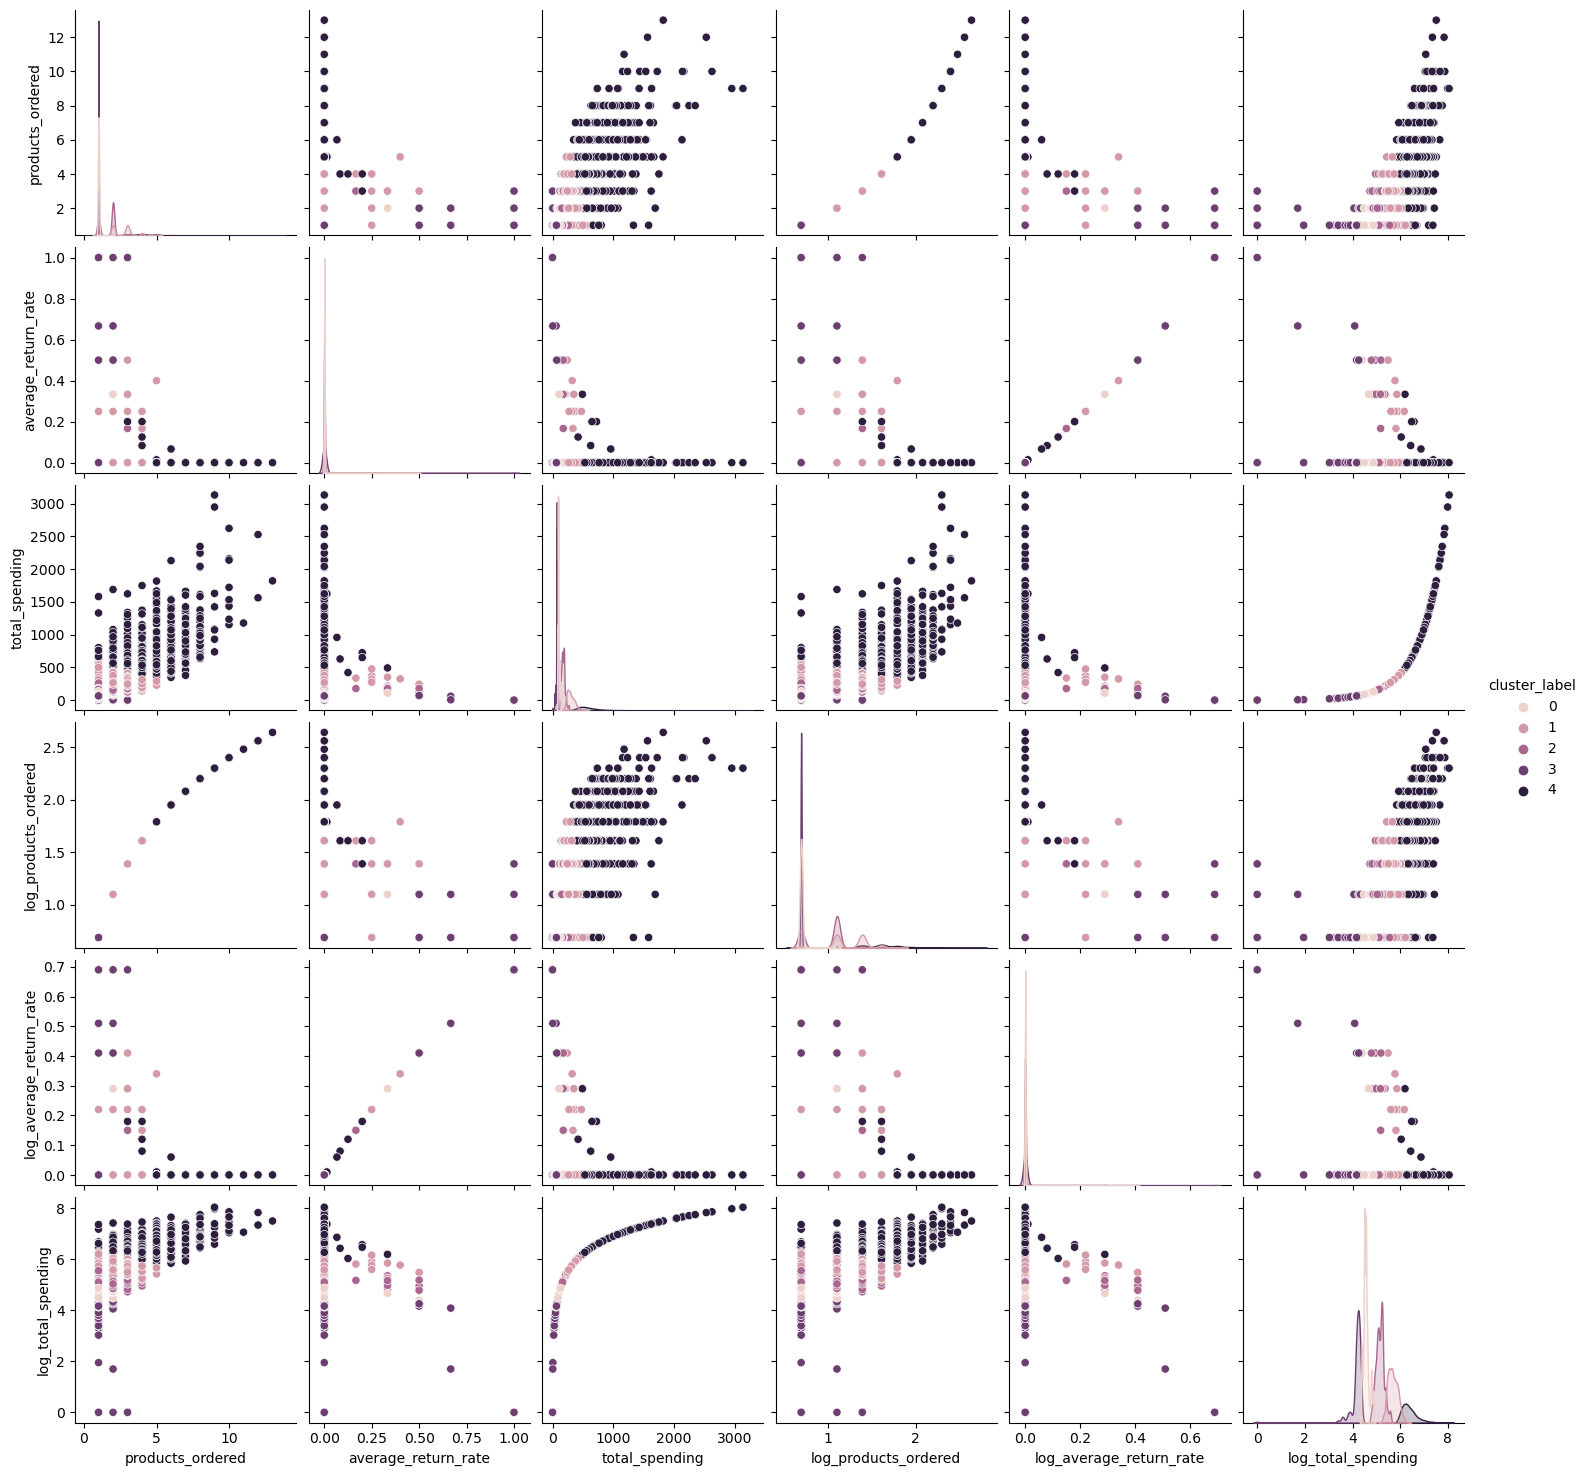

In [66]:



sns.pairplot(customers, hue='cluster_label')
plt.show()


In [67]:

original_columns = data_for_clustering.columns
scaling_factors = customers[original_columns].max() - customers[original_columns].min()

cluster_centers_scaled = kmeans_model_final.cluster_centers_
cluster_centers_original = cluster_centers_scaled * scaling_factors.values + customers[original_columns].min().values


cluster_centers_rounded = np.round(cluster_centers_original, 2)


cluster_centers_df = pd.DataFrame(cluster_centers_rounded, columns=original_columns)


print("Rounded Cluster Centers:")
print(cluster_centers_df)


Rounded Cluster Centers:
   log_products_ordered  log_average_return_rate  log_total_spending
0                  2.08                      0.0               36.74
1                  3.12                      0.0               45.74
2                  2.56                      0.0               41.42
3                  2.04                      0.0               33.46
4                  3.82                      0.0               51.35


In [68]:

customer_labels = kmeans_model_final.predict(data_for_clustering)

customers['cluster_label'] = customer_labels

merged_data = pd.merge(customers, cluster_centers_df, how='left', left_on='cluster_label', right_index=True, suffixes=('_customer', '_center'))

print("Merged Data:")
print(merged_data)



Merged Data:
       products_ordered  average_return_rate  total_spending  \
0                     1                  0.0           260.0   
1                     1                  0.0            79.2   
2                     3                  0.0           234.2   
3                     1                  0.0            89.0   
4                     2                  0.0           103.0   
...                 ...                  ...             ...   
24869                 2                  0.0           259.0   
24870                 2                  0.0           242.5   
24871                 1                  0.0            89.0   
24872                 2                  0.0           267.0   
24873                 1                  0.0            64.0   

       log_products_ordered_customer  log_average_return_rate_customer  \
0                               0.69                               0.0   
1                               0.69                               0.0

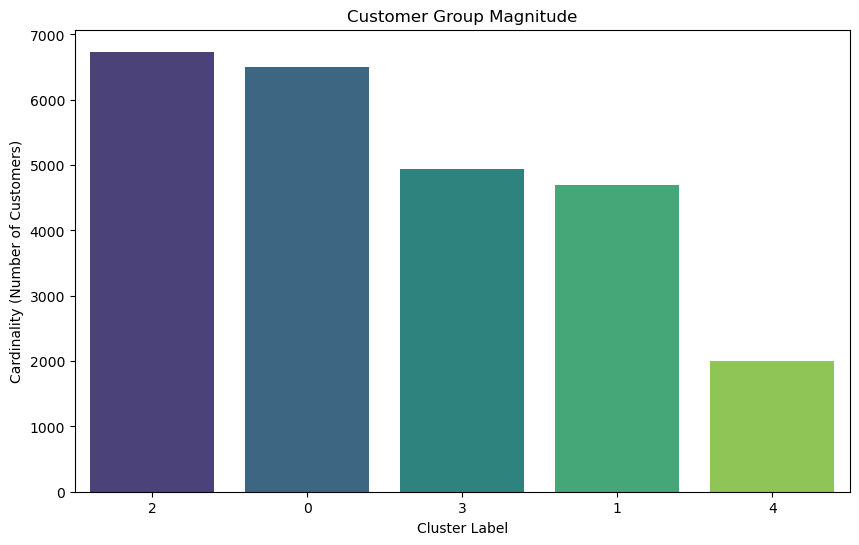

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_data['cluster_label_str'] = merged_data['cluster_label'].astype(str)

cluster_cardinality = merged_data['cluster_label_str'].value_counts().reset_index()
cluster_cardinality.columns = ['cluster_label', 'cardinality']


plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_label', y='cardinality', data=cluster_cardinality, palette='viridis')
plt.title("Customer Group Magnitude")
plt.xlabel("Cluster Label")
plt.ylabel("Cardinality (Number of Customers)")
plt.show()
